In [38]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from data_synthesizer.synthesizer import generate, LABELS

In [35]:
input_shape=(128,416)

In [9]:
images, df = generate(10)

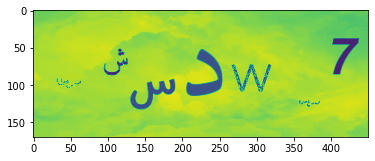

In [10]:
plt.imshow(images[3])

In [6]:
from yolo3.utils import get_random_data

In [11]:
im,b=get_random_data(images, df, 3, input_shape, max_boxes=12)

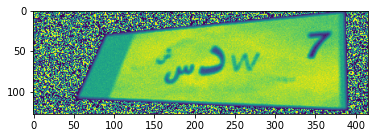

In [12]:
plt.imshow(im)

In [13]:
b

array([[ 26., 198.,  98., 246.,  15.],
       [ 57., 157., 100., 203.,  11.],
       [ 57., 116.,  85., 141.,  19.],
       [ 24., 332.,  59., 380.,   7.],
       [ 29., 237., 101., 285.,  20.],
       [ 41., 150.,  70., 175.,  12.],
       [ 66., 302., 103., 326.,  19.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

# Train your model

In [3]:
from yolo3.main import train

In [ ]:
model=train(images, df, save=True)

Create YOLOv3 model with 9 anchors and 22 classes.
Epoch 1, 


# Load your models and start predicting

In [33]:
from yolo3.main import create_model
from yolo3.model import yolo_eval

In [31]:
anchors = np.array([[59, 23], [74, 28], [79, 47], [89, 22], [96, 32], [118, 58], [124, 39], [125, 22], [58, 36]])
num_classes=22
model = create_model(anchors, num_classes)
model.load_weights('C:/Users/User/Desktop/YOLO3/model/yolo_for_characters')

Create YOLOv3 model with 9 anchors and 22 classes.


In [14]:
net = cv2.dnn.readNet('C:/Users/User/Desktop/YOLO3/yolov3_plates_final.weights',
                      'C:/Users/User/Desktop/YOLO3/yolov3-license-plates.cfg')
plate_finder = cv2.dnn_DetectionModel(net)
plate_finder.setInputParams(size=(832,832),scale=1/255)
def get_plate(path):
    img = cv2.imread(path)
    img = cv2.resize(img,(832,832))
    (c,s,b)=plate_finder.detect(img)
    n = np.argmax(s)
    img = img[b[n,1]-int(b[n,3]*0.3):b[n,1]+int(b[n,3]*1.1),
              b[n,0]-int(b[n,2]*0.3):b[n,0]+int(b[n,2]*1.1)]
    return cv2.resize(img,(416,128))

In [46]:
img = get_plate('C:/Users/User/Desktop/YOLO3/450.jpg')

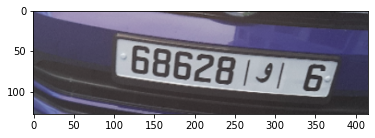

In [47]:
plt.imshow(img)

In [49]:
cv2.imwrite('plate.png',img)

True

In [50]:
img0 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
yolo_outputs = model(np.array([img0/300]) )
boxes_, scores_, classes_ = yolo_eval(yolo_outputs,
              anchors,
              num_classes,
              input_shape,
              max_boxes=12,
              score_threshold=.5,
              iou_threshold=.5)

In [51]:
for i in range(len(scores_)) :
    b=boxes_[i]
    c=classes_[i]
    s=scores_[i]
    print(LABELS[int(c)])
    img = cv2.putText(img,LABELS[int(c)] , (int(b[1]),int(b[0])), cv2.FONT_HERSHEY_PLAIN,3,(0,250,250))
    img = cv2.rectangle(img, (int(b[1]),int(b[0])), (int(b[3]),int(b[2])), (255,0,0), 3)

2
6
6
6
8
8
و


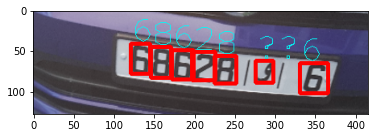

In [52]:
plt.imshow(img)